In [1]:
# Standard import
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

In [2]:
# Stats
from scipy import stats

In [3]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

(array([  3.,   7.,   7.,  18.,  23.,  19.,   9.,   7.,   5.,   2.]),
 array([-2.19556806, -1.72935299, -1.26313793, -0.79692286, -0.33070779,
         0.13550728,  0.60172235,  1.06793742,  1.53415249,  2.00036755,
         2.46658262]),
 <a list of 10 Patch objects>)

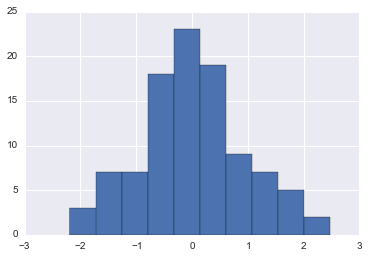

In [6]:
#Create a random normal-dist dataset
dataset1 = randn(100)

#Plot a histogram of the dataset, note bins=10 by default
plt.hist(dataset1)

(array([  3.,   4.,   7.,  10.,  13.,  13.,  16.,   9.,   3.,   2.]),
 array([-2.19332728, -1.71509349, -1.2368597 , -0.75862591, -0.28039211,
         0.19784168,  0.67607547,  1.15430926,  1.63254306,  2.11077685,
         2.58901064]),
 <a list of 10 Patch objects>)

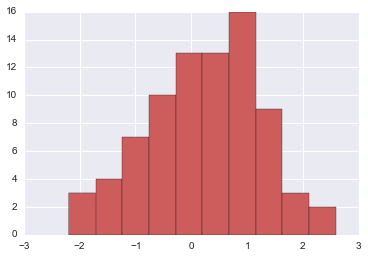

In [7]:
# Lets make another dataset
dataset2 = randn(80)

#Plot
plt.hist(dataset2,color='indianred')

(array([ 0.15682706,  0.        ,  0.05227569,  0.15682706,  0.26137843,
         0.10455137,  0.31365412,  0.20910275,  0.36592981,  0.31365412,
         0.15682706,  0.52275687,  0.31365412,  0.52275687,  0.20910275,
         0.26137843,  0.10455137,  0.05227569,  0.        ,  0.10455137]),
 array([-2.19332728, -1.95421039, -1.71509349, -1.47597659, -1.2368597 ,
        -0.9977428 , -0.75862591, -0.51950901, -0.28039211, -0.04127522,
         0.19784168,  0.43695858,  0.67607547,  0.91519237,  1.15430926,
         1.39342616,  1.63254306,  1.87165995,  2.11077685,  2.34989375,
         2.58901064]),
 <a list of 20 Patch objects>)

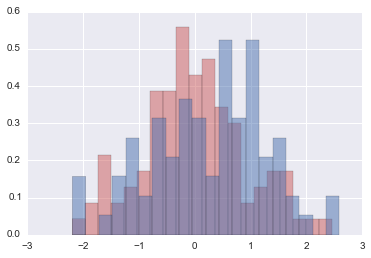

In [8]:
# We can use normed to plot on same plot

# Set normed=True for the plots to be normalized in order to comapre data sets with different number of observations
# Set alpha=0.5 for transperancy

plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

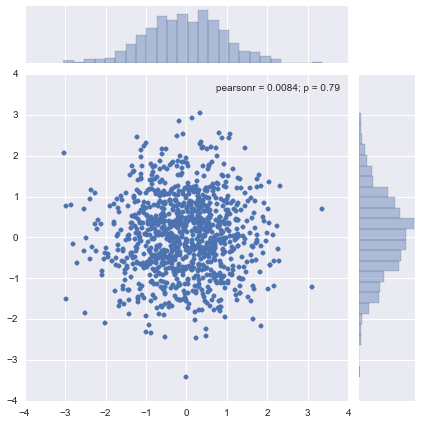

In [9]:
# Make two more random normal dist data sets
data1 = randn(1000)
data2 = randn(1000)

#Can represent joint distributions using joint plots
sns.jointplot(data1,data2)

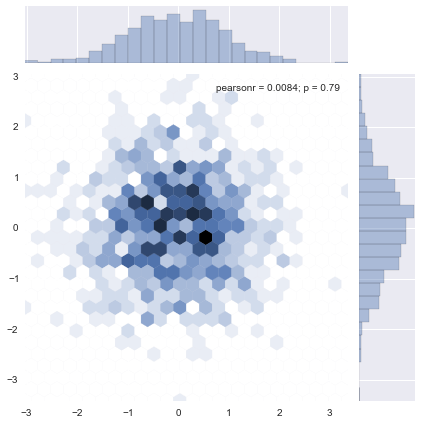

In [10]:
# Can also use hex bins for a more concise picture
sns.jointplot(data1,data2,kind='hex')

### Kernel Estimation Density Plots

In [16]:
# For refresher
import webbrowser
url = 'https://en.wikipedia.org/wiki/Kernel_density_estimation'
webbrowser.open(url)

True

In [15]:
# For more practice; kde in python
kde_url = 'https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/'
webbrowser.open(kde_url)

True

(0, 1)

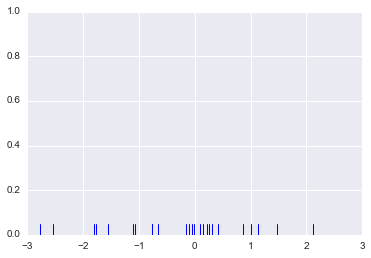

In [11]:
# Let's start off with a carpet/rug plot
# A rug plot simpot puts ticks wherever a value occured

#Create dataset
dataset = randn(25)

#Create rugplot
sns.rugplot(dataset)
#Set y-axis limit
plt.ylim(0,1)

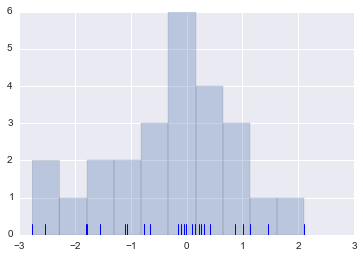

In [12]:
# Plot a histogram on top of 
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)


The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar.

The kernel density plot will represent each tick mark with a gaussian basis function.

##### kde plot using seaborn

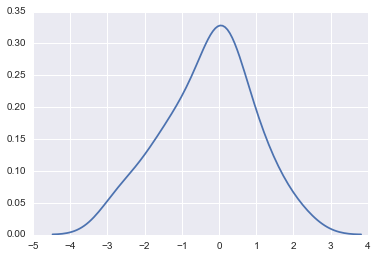

In [17]:
sns.kdeplot(dataset)

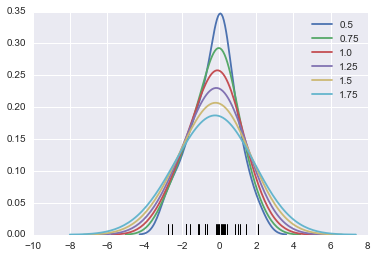

In [18]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

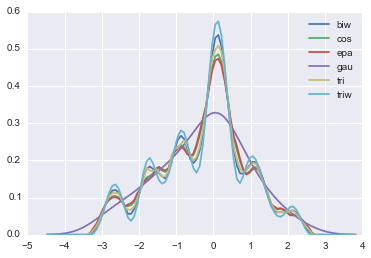

In [19]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

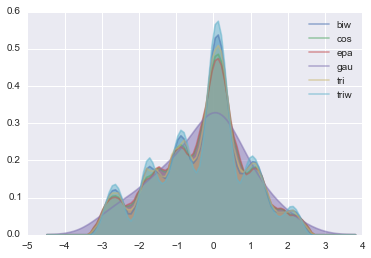

In [20]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

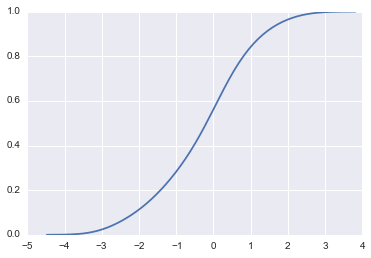

In [22]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

### Multivariate Density Estimation using kdeplot

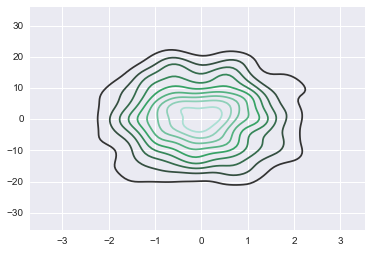

In [23]:
# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

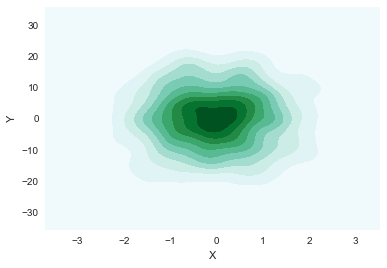

In [24]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)

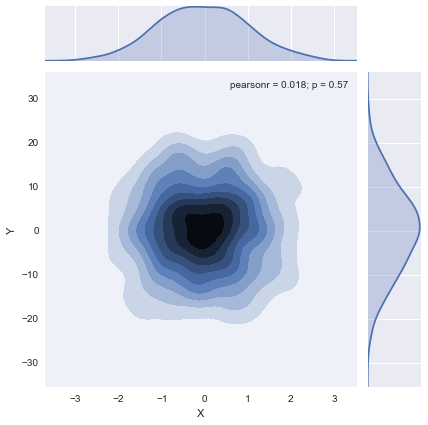

In [25]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before
sns.jointplot('X','Y',dframe,kind='kde')

### Combining Plot Styles

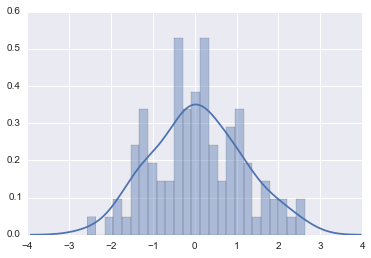

In [26]:
# Create datset
dataset = randn(100)

# Use distplot for combining plots, by default a kde over a histogram is shown
sns.distplot(dataset,bins=25)

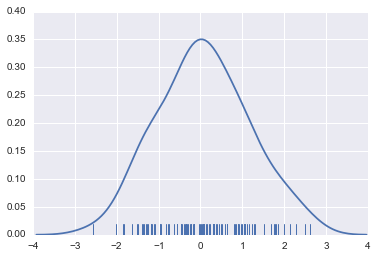

In [27]:
# hist, rug, and kde are all input arguments to turn those plots on or off
sns.distplot(dataset,rug=True,hist=False)

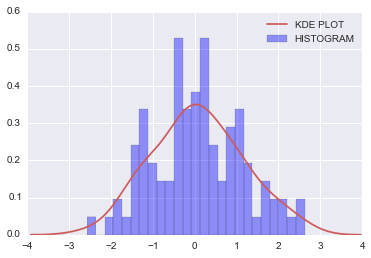

In [28]:
# TO control specific plots in distplot, use [plot]_kws argument with dictionaries.

#Here's an example

sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

In [29]:
# Use Pandas object
# Create Series form dataset
ser1 = Series(dataset,name='My_DATA')

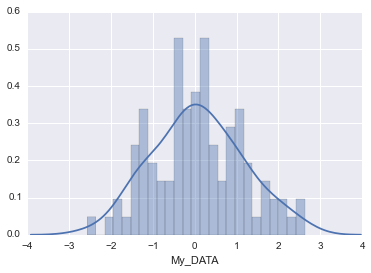

In [30]:
sns.distplot(ser1,bins=25)

### Box and Violin Plots

In [73]:
# Now we'll learn about box and violin plots
url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'
from numpy.random import randn
# Let's create two distributions
data1 = randn(100)
data2 = randn(100)

In [76]:
# Now we can create a box plot
# sns.boxplot([data1,data2])

In [77]:
# Notice how the previous plot had outlier points, we can include those with the "whiskers"
# sns.boxplot([data1,data2],whis=np.inf)

In [78]:
# sns.violinplot(data2,bw=0.01)

In [79]:
# sns.violinplot([data1,data2])

### Multiple Regression Plots

In [6]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


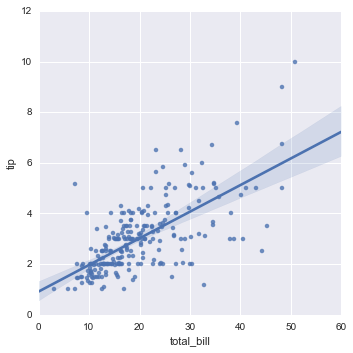

In [7]:
# Let's use lmplot() to plot the total bill versus tips
sns.lmplot("total_bill","tip",tips)

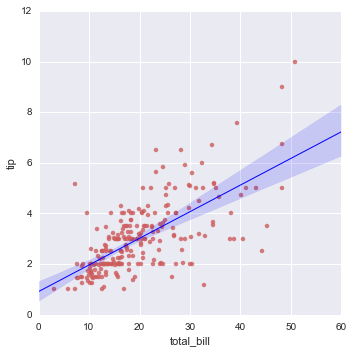

In [14]:
# Pass a dictionary
sns.lmplot('total_bill', 'tip', tips, 
          scatter_kws={'marker':'o', 'color':'indianred'},
          line_kws={'linewidth':1, 'color':'blue'})

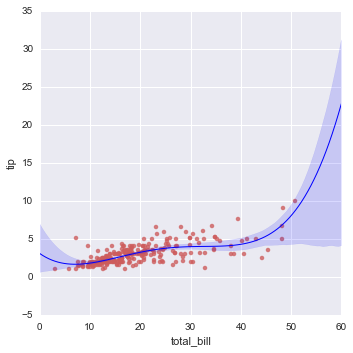

In [15]:
sns.lmplot("total_bill", "tip", tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

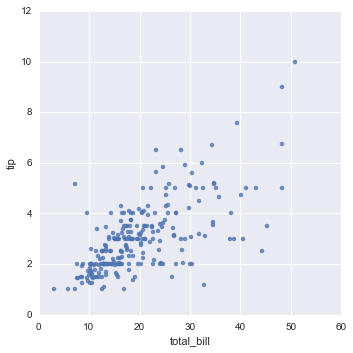

In [16]:
# We can also not fit a regression if desired
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

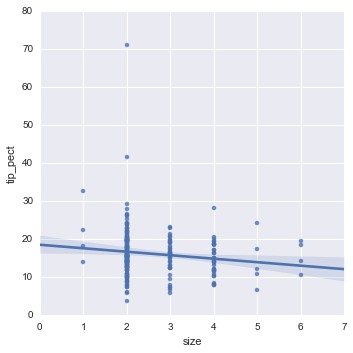

In [17]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot("size", "tip_pect", tips);

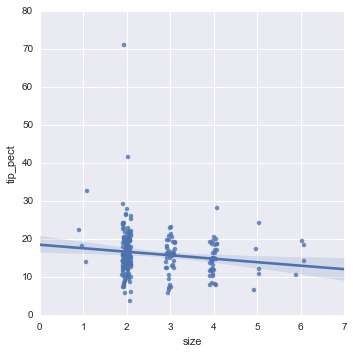

In [19]:
url='https://en.wikipedia.org/wiki/Jitter'

#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

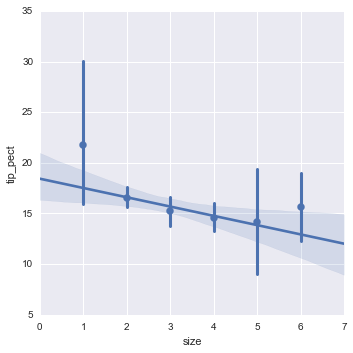

In [21]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);   # More varibale for those tips for party 1 than 2, 3 and 4

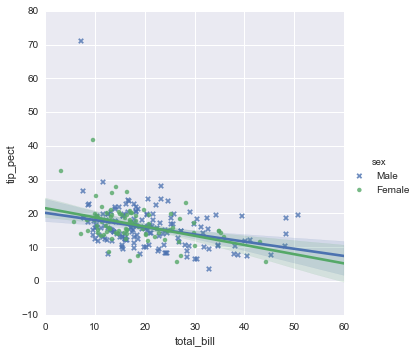

In [22]:
# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument. Does sex make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

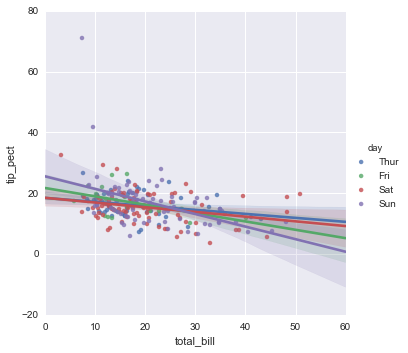

In [23]:
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

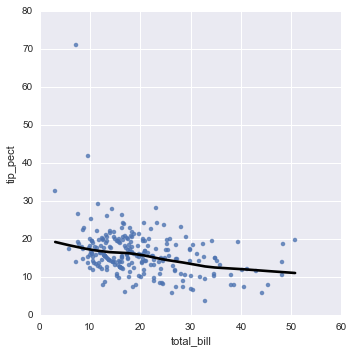

In [24]:
# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

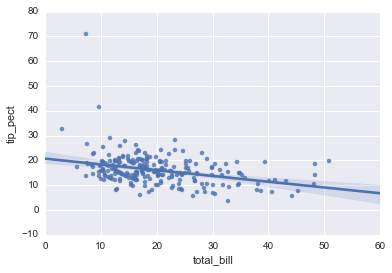

In [25]:
# The lmplot() we've been using is actually using a lower-level function, regplot()

sns.regplot("total_bill","tip_pect",tips)

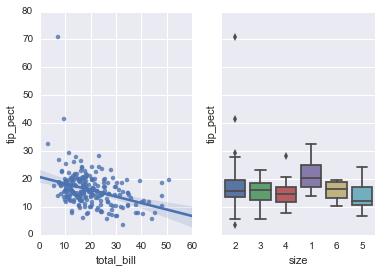

In [37]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.boxplot(x='size', y='tip_pect', data = tips, ax=axis2)

In [38]:
# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')

In [45]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [46]:
# Let's pivot this dataframe do its easier to manage
flight_dframe = flight_dframe.pivot("month","year","passengers")

flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


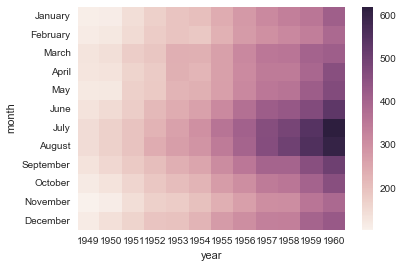

In [47]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe)

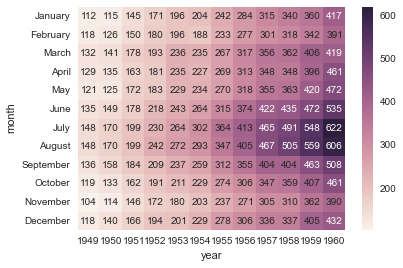

In [48]:
# We also have the option to annotate each cell
sns.heatmap(flight_dframe,annot=True,fmt='d')

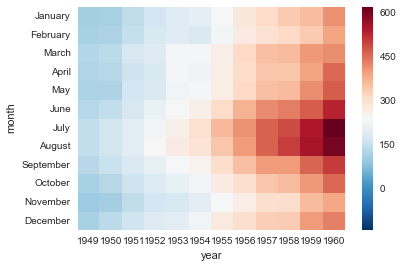

In [49]:
# seaborn will automatically try to pick the best color scheme for your dataset, whether is be diverging or 
# converging colormap

# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

In [50]:
# Find the total flights each year
yearly_flights = flight_dframe.sum()
yearly_flights

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [51]:
type(yearly_flights)

pandas.core.series.Series

In [55]:
# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

In [56]:
year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


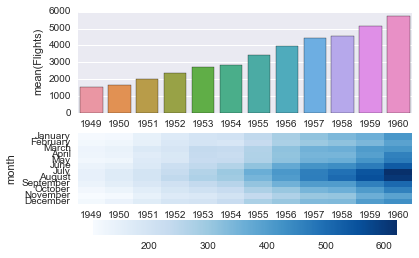

In [57]:
# heatmap() can be used on axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

In [58]:
flight_dframe.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


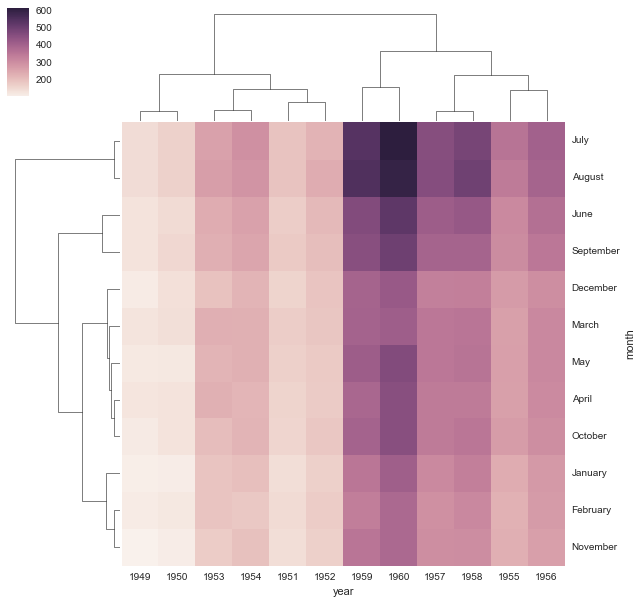

In [59]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

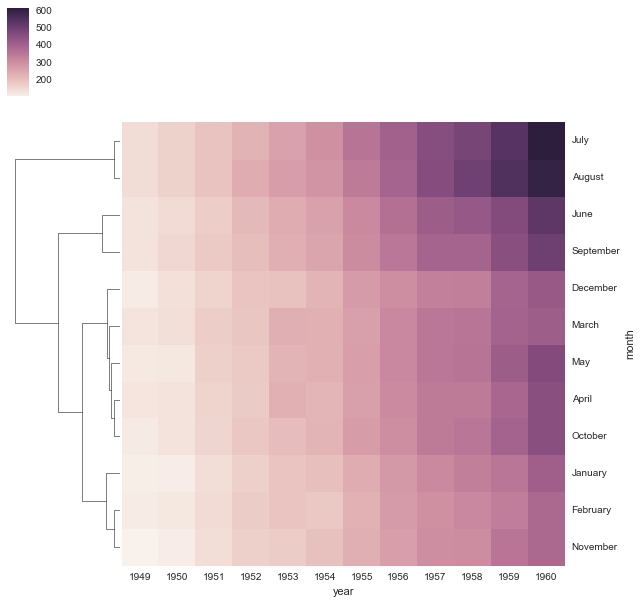

In [60]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False)

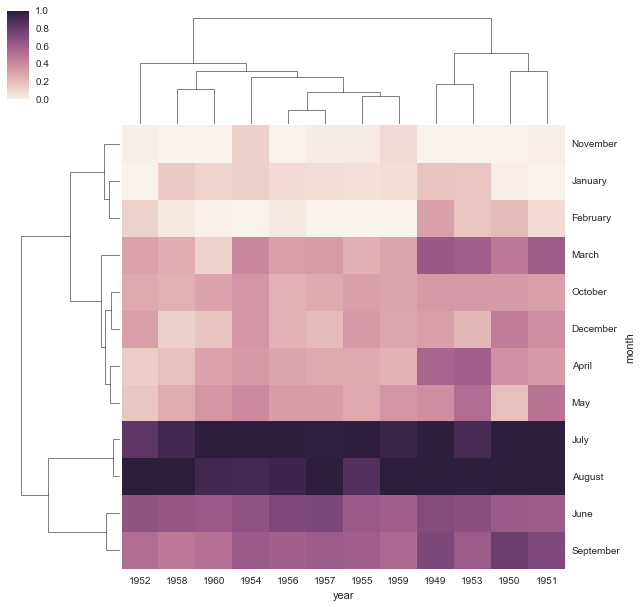

In [61]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

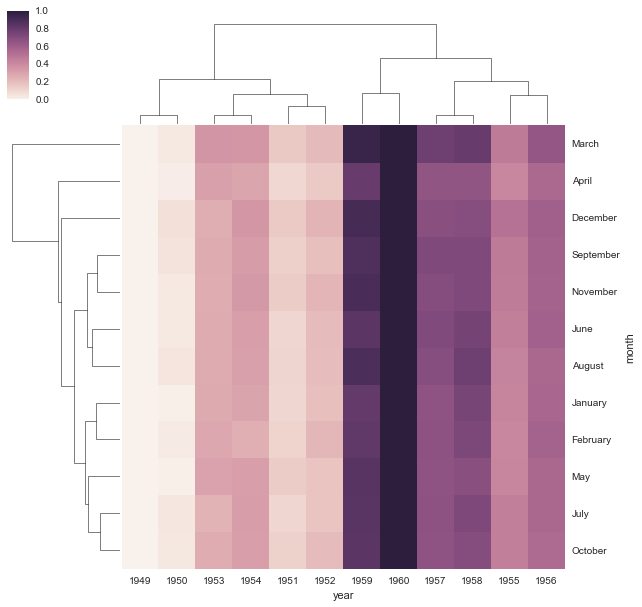

In [62]:
# Or scale the rows
sns.clustermap(flight_dframe,standard_scale=0)

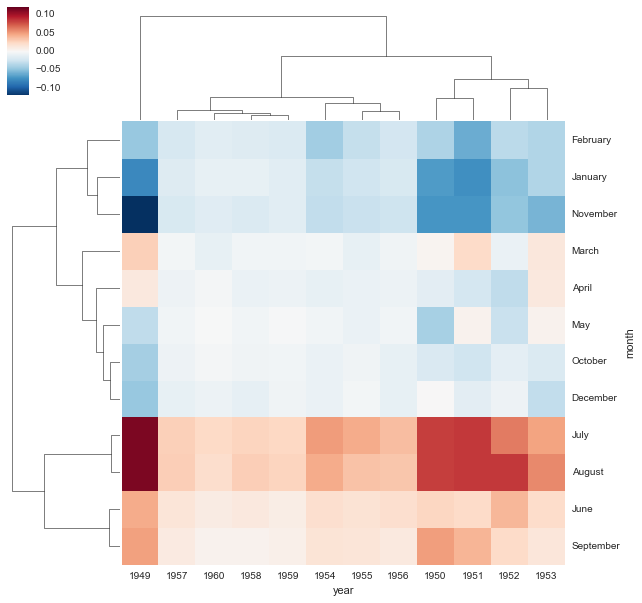

In [63]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)

Above we can see which values are greater than the mean and which are below very clearly